In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest
#sys.path.append('C:\\Users\\brittany\\henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f
#sys.path.append(R'C:\Users\Lindsey\Documents\GitHub\WhenMutationsDontMatter\\')
#import plot_utils as p


import cptac
import cptac.utils as u

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
df1 = brain.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR")
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)


df2 = df1.loc[df1['Sample_Status_'] == "Tumor"]
df2

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


,A2M_phosphoproteomics_S273,AAAS_phosphoproteomics_S495,AAAS_phosphoproteomics_S495,AAAS_phosphoproteomics_S525,AAAS_phosphoproteomics_S525S541,AAAS_phosphoproteomics_S541,AAED1_phosphoproteomics_S12,AAGAB_phosphoproteomics_S189,AAGAB_phosphoproteomics_S196S199,AAGAB_phosphoproteomics_S199,...,ZZZ3_phosphoproteomics_S397Y399,ZZZ3_phosphoproteomics_S606,ZZZ3_phosphoproteomics_S777,ZZZ3_phosphoproteomics_T418,ZZZ3_phosphoproteomics_Y399,ZZZ3_phosphoproteomics_Y399S426,EGFR_Mutation_,EGFR_Location_,EGFR_Mutation_Status_,Sample_Status_
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00104,NaN,0.053418,NaN,0.118623,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00365,NaN,-0.093105,-0.095450,0.069499,NaN,NaN,-1.221096,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Missense_Mutation],[p.G665D],Single_mutation,Tumor
C3L-00674,NaN,-1.084975,NaN,NaN,NaN,1.368630,NaN,NaN,NaN,NaN,...,NaN,0.064722,0.216607,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00677,NaN,-0.260149,0.390607,0.336969,NaN,0.411596,NaN,0.812857,0.118422,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-01040,NaN,-0.344549,NaN,-0.082962,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03183,NaN,-0.046331,0.223123,NaN,NaN,NaN,0.129488,NaN,NaN,NaN,...,NaN,0.578900,NaN,NaN,NaN,NaN,[Missense_Mutation],[p.P596L],Single_mutation,Tumor
C3N-03184,NaN,0.439788,0.799441,NaN,NaN,-0.359969,NaN,NaN,-0.669859,-0.075658,...,NaN,NaN,NaN,NaN,0.363741,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3N-03186,NaN,-0.284134,NaN,NaN,NaN,0.530625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


In [28]:


df2.filter(like='EGFR_phosphoproteomics_Y', axis=1)

,EGFR_phosphoproteomics_Y1092,EGFR_phosphoproteomics_Y1110,EGFR_phosphoproteomics_Y1125,EGFR_phosphoproteomics_Y1125T1145,EGFR_phosphoproteomics_Y1172,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_Y316,EGFR_phosphoproteomics_Y316,EGFR_phosphoproteomics_Y764,EGFR_phosphoproteomics_Y998
Patient_ID,,,,,,,,,,
C3L-00104,NaN,0.713628,NaN,NaN,1.977394,2.326907,NaN,-4.554552,NaN,NaN
C3L-00365,NaN,1.900383,NaN,NaN,3.831216,4.392495,NaN,-0.689090,NaN,0.992811
C3L-00674,0.421457,-0.851118,-0.572868,0.459301,-0.152648,0.521459,0.231844,0.000535,NaN,0.183023
C3L-00677,-1.548885,0.399811,NaN,NaN,-1.365995,-1.272197,NaN,-0.933573,NaN,NaN
C3L-01040,NaN,-0.209843,NaN,NaN,-0.710159,-3.047771,NaN,-0.652991,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
C3N-03183,NaN,NaN,NaN,NaN,-0.303561,-1.838129,NaN,-0.754862,NaN,-0.623662
C3N-03184,0.150344,0.062236,NaN,NaN,0.221283,-0.274030,0.533673,3.678630,NaN,NaN
C3N-03186,-1.385977,-0.146275,NaN,NaN,-1.305470,-0.255198,NaN,-0.353529,NaN,-0.202275


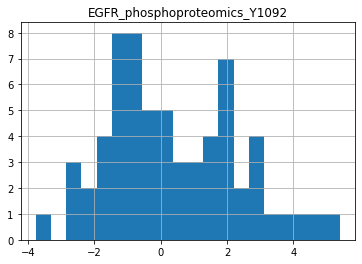

In [33]:
#check to see if column is normally distributed 
hist = df2.hist("EGFR_phosphoproteomics_Y1092",bins=20)

In [7]:
df = pd.read_csv("pancan_EGFR_pearson_append.csv")
df = df.drop(['Unnamed: 0'], axis=1)

df2 = df.drop([0])

In [8]:
df2

,Comparison,Correlation,P_value,Cancer Type
1,GRB2_proteomics,-0.610889,1.886384e-11,GBM
2,CDH4_proteomics,0.559180,1.790048e-09,GBM
3,SHC1_proteomics,-0.540524,7.695118e-09,GBM
4,WAS_proteomics,-0.501918,1.205168e-07,GBM
5,NPC2_proteomics,-0.498791,1.484249e-07,GBM
...,...,...,...,...
8136,BCL2_proteomics,-0.001499,9.917570e-01,Lscc
8137,PPP1R12A_proteomics,0.000934,9.922710e-01,Lscc
8138,ARPC5_proteomics,-0.000894,9.926056e-01,Lscc
8139,AMOT_proteomics,-0.000791,9.934577e-01,Lscc


In [11]:
pathway = ["GRB2_proteomics", "SHC1_proteomics","SOS1_proteomics","NRAS_proteomics","KRAS_proteomics","HRAS_proteomics","RASGRP2_proteomics","RAF1_proteomics","MAP3K1_proteomics","MAP3K2_proteomics","MAPK1_proteomics","MAPK3_proteomics","MKNK1_proteomics","ELF4_proteomics","BCL2L11_proteomics","RPS6KA3_proteomics"]
pathway2 = ["GAB1_proteomics","PDPK1_phosphoproteomics_S241","AKT1_proteomics","AKT2_proteomics","AKT3_proteomics","CASP9_proteomics","MDM2_proteomics","GSK3B_proteomics","FOXO_proteomics","MTOR_proteomics","TSC2_proteomics","S6K_proteomics","BAD_proteomics","EIF4EBP1_proteomics"]

df3= df2[df2.Comparison.isin(pathway2)]
df3

,Comparison,Correlation,P_value,Cancer Type
40,GAB1_proteomics,0.425874,0.000011,GBM
123,EIF4EBP1_proteomics,-0.339260,0.000592,GBM
381,AKT2_proteomics,0.209545,0.037376,GBM
396,MTOR_proteomics,0.204392,0.042425,GBM
477,GSK3B_proteomics,0.169639,0.093222,GBM
...,...,...,...,...
7730,AKT3_proteomics,-0.074813,0.437293,Lscc
7750,AKT1_proteomics,0.071093,0.460484,Lscc
7817,GAB1_proteomics,-0.056832,0.555371,Lscc
8062,CASP9_proteomics,0.013330,0.890074,Lscc


In [12]:
import pandas as pd
from bokeh.palettes import RdBu
from bokeh.models import LinearColorMapper, ColumnDataSource, ColorBar
from bokeh.models.ranges import FactorRange
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import numpy as np


df3['size'] = np.where(df3['Correlation']<0, np.abs(df3['Correlation']), df3['Correlation'])*50
#added a new column to make the plot size

colors = list(reversed(RdBu[9]))
exp_cmap = LinearColorMapper(palette=colors, 
                             low = -1, 
                             high = 1)
p = figure(x_range = FactorRange(), y_range = FactorRange(), plot_width=700, 
           plot_height=450, 
           toolbar_location=None, tools="hover")

p.scatter("Comparison","Cancer Type",source=df3, fill_alpha=1,  line_width=0, size="size", 
          fill_color={"field":"Correlation", "transform":exp_cmap})

p.x_range.factors = sorted(df3['Comparison'].unique().tolist())
p.y_range.factors = sorted(df3['Cancer Type'].unique().tolist(), reverse = True)
p.xaxis.major_label_orientation = math.pi/2
#p.xaxis.axis_label = 'Values'
#p.yaxis.axis_label = 'Values'

bar = ColorBar(color_mapper=exp_cmap, location=(0,0))
p.add_layout(bar, "right")

show(p)

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [41]:
df3

,Comparison,Correlation,P_value,Cancer Type,size
1,GRB2_proteomics,-0.610889,1.886384e-11,GBM,30.544456
3,SHC1_proteomics,-0.540524,7.695118e-09,GBM,27.026225
84,MAP3K2_proteomics,-0.373185,1.421575e-04,GBM,18.659254
202,RASGRP2_proteomics,0.286756,4.006639e-03,GBM,14.337778
664,MAP3K1_proteomics,-0.141907,2.672471e-01,GBM,7.095364
...,...,...,...,...,...
7525,MAPK3_proteomics,-0.122797,2.012349e-01,Lscc,6.139873
7799,MAP3K1_proteomics,0.060273,5.316449e-01,Lscc,3.013654
7828,NRAS_proteomics,-0.054907,5.688698e-01,Lscc,2.745329
7868,RASGRP2_proteomics,-0.047377,6.230805e-01,Lscc,2.368826


In [54]:
, plot_width=700, 
           plot_height=450,

,x,y,corr,size
0,A,B,0.408211,20.410535
1,A,C,0.401669,20.083430
2,A,D,0.830986,41.549318
3,B,A,0.592343,29.617143
4,B,C,0.173884,8.694191
5,B,D,-0.357495,17.874764
6,C,B,-0.463938,23.196916
7,C,D,0.764863,38.243152
8,C,A,0.041784,2.089209
9,D,A,-0.219539,10.976961


In [43]:
df3

,Comparison,Correlation,P_value,Cancer Type,size
1,GRB2_proteomics,-0.610889,1.886384e-11,GBM,30.544456
3,SHC1_proteomics,-0.540524,7.695118e-09,GBM,27.026225
84,MAP3K2_proteomics,-0.373185,1.421575e-04,GBM,18.659254
202,RASGRP2_proteomics,0.286756,4.006639e-03,GBM,14.337778
664,MAP3K1_proteomics,-0.141907,2.672471e-01,GBM,7.095364
...,...,...,...,...,...
7525,MAPK3_proteomics,-0.122797,2.012349e-01,Lscc,6.139873
7799,MAP3K1_proteomics,0.060273,5.316449e-01,Lscc,3.013654
7828,NRAS_proteomics,-0.054907,5.688698e-01,Lscc,2.745329
7868,RASGRP2_proteomics,-0.047377,6.230805e-01,Lscc,2.368826


In [ ]:
fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")

plt.show()

In [3]:
df = pd.read_csv("pancan_EGFR_pearson_append_phospho_phospho.csv")
df = df.drop(['Unnamed: 0'], axis=1)

df2 = df.drop([0])

In [4]:
df2

,Comparison,Correlation,P_value,Cancer Type
1,EGFR_phosphoproteomics_Y1172,0.899603,8.871131e-34,GBM
2,EGFR_phosphoproteomics_S1166Y1172,0.881333,1.002277e-30,GBM
3,EGFR_phosphoproteomics_Y1092,0.908060,3.304647e-23,GBM
4,EGFR_phosphoproteomics_S1166,0.739790,5.458615e-17,GBM
5,EGFR_phosphoproteomics_S991,0.738219,6.868158e-17,GBM
...,...,...,...,...
247809,ITPR2_phosphoproteomics_T1856,0.000020,9.998640e-01,Lscc
247810,CLIP2_phosphoproteomics_S202S204S207,-0.000008,9.999443e-01,Lscc
247811,PDLIM4_phosphoproteomics_S112,0.000006,9.999568e-01,Lscc
247812,WDR44_phosphoproteomics_S262T271,-0.000003,9.999820e-01,Lscc


In [5]:
pathway2 = ["SHC1_phosphoproteomics_Y317","RAF1_phosphoproteomics_S621","RAF1_phosphoproteomics_S259","RAF1_phosphoproteomics_S338","RAF1_phosphoproteomics_Y340","RAF1_phosphoproteomics_Y341","MAP3K1_phosphoproteomics_S217","MAP3K1_phosphoproteomics_S221","MAPK3_phosphoproteomics_Y204","MAPK3_phosphoproteomics_T202Y204","MAPK3_phosphoproteomics_T202","MKNK1_phosphoproteomics_T197","MKNK1_phosphoproteomics_T202","ELF4_phosphoproteomics_S209","BCL2L11_phosphoproteomics_S69","RPS6KA1_phosphoproteomics_T573","RPS6KA3_phosphoproteomics_S573"]
pathway3 = ["GAB1_phosphoproteomics_Y446","GAB1_phosphoproteomics_Y472","GAB1_phosphoproteomics_Y589","PDPK1_phosphoproteomics_S241","AKT1_phosphoproteomics_S473","AKT1_phosphoproteomics_T308","CASP9_phosphoproteomics_S196","MDM2_phosphoproteomics_S166","GSK3B_phosphoproteomics_S9","FOXO_phosphoproteomics_T32","FOXO_phosphoproteomics_S253","MTOR_phosphoproteomics_S2448","TSC2_phosphoproteomics_T1462","S6K_phosphoproteomics_T389","BAD_phosphoproteomics_S134","EIF4EBP1_phosphoproteomics_T46","EIF4EBP1_phosphoproteomics_T45T46","EIF4EBP1_phosphoproteomics_T41T46"]

df3= df2[df2.Comparison.isin(pathway2)]
df3

,Comparison,Correlation,P_value,Cancer Type
1768,MAPK3_phosphoproteomics_T202Y204,-0.313546,0.006523,GBM
4493,MAPK3_phosphoproteomics_T202,-0.436888,0.028985,GBM
7312,MAPK3_phosphoproteomics_Y204,-0.197780,0.060214,GBM
43525,RAF1_phosphoproteomics_S259,0.064317,0.717820,GBM
57933,SHC1_phosphoproteomics_Y317,0.344547,0.017711,Kidney
70880,MAPK3_phosphoproteomics_T202Y204,-0.123818,0.386681,Kidney
77861,MAPK3_phosphoproteomics_Y204,-0.065041,0.650226,Kidney
87731,RAF1_phosphoproteomics_S621,0.301949,0.077920,Ovar
97961,MAPK3_phosphoproteomics_Y204,0.243045,0.018902,Luad
112600,MAPK3_phosphoproteomics_T202Y204,-0.115120,0.274512,Luad


In [6]:
import pandas as pd
from bokeh.palettes import RdBu
from bokeh.models import LinearColorMapper, ColumnDataSource, ColorBar
from bokeh.models.ranges import FactorRange
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import numpy as np


df3['size'] = np.where(df3['Correlation']<0, np.abs(df3['Correlation']), df3['Correlation'])*50
#added a new column to make the plot size

colors = list(reversed(RdBu[9]))
exp_cmap = LinearColorMapper(palette=colors, 
                             low = -1, 
                             high = 1)
p = figure(x_range = FactorRange(), y_range = FactorRange(), plot_width=700, 
           plot_height=450, 
           toolbar_location=None, tools="hover")

p.scatter("Comparison","Cancer Type",source=df3, fill_alpha=1,  line_width=0, size="size", 
          fill_color={"field":"Correlation", "transform":exp_cmap})

p.x_range.factors = sorted(df3['Comparison'].unique().tolist())
p.y_range.factors = sorted(df3['Cancer Type'].unique().tolist(), reverse = True)
p.xaxis.major_label_orientation = math.pi/2
#p.xaxis.axis_label = 'Values'
#p.yaxis.axis_label = 'Values'

bar = ColorBar(color_mapper=exp_cmap, location=(0,0))
p.add_layout(bar, "right")

show(p)

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
df = pd.read_csv("pancan_EGFR_pearson_append_prot_phospho.csv")
df = df.drop(['Unnamed: 0'], axis=1)

df2 = df.drop([0])

In [19]:
pathway2 = ["SHC1_phosphoproteomics_Y317","RAF1_phosphoproteomics_S621","RAF1_phosphoproteomics_S259","RAF1_phosphoproteomics_S338","RAF1_phosphoproteomics_Y340","RAF1_phosphoproteomics_Y341","MAP3K1_phosphoproteomics_S217","MAP3K1_phosphoproteomics_S221","MAPK3_phosphoproteomics_Y204","MAPK3_phosphoproteomics_T202Y204","MAPK3_phosphoproteomics_T202","MKNK1_phosphoproteomics_T197","MKNK1_phosphoproteomics_T202","ELF4_phosphoproteomics_S209","BCL2L11_phosphoproteomics_S69","RPS6KA1_phosphoproteomics_T573","RPS6KA3_phosphoproteomics_S573"]
pathway3 = ["GAB1_phosphoproteomics_Y446","GAB1_phosphoproteomics_Y472","GAB1_phosphoproteomics_Y589","PDPK1_phosphoproteomics_S241","AKT1_phosphoproteomics_S473","AKT1_phosphoproteomics_T308","CASP9_phosphoproteomics_S196","MDM2_phosphoproteomics_S166","GSK3B_phosphoproteomics_S9","FOXO_phosphoproteomics_T32","FOXO_phosphoproteomics_S253","MTOR_phosphoproteomics_S2448","TSC2_phosphoproteomics_T1462","S6K_phosphoproteomics_T389","BAD_phosphoproteomics_S134","EIF4EBP1_phosphoproteomics_T46","EIF4EBP1_phosphoproteomics_T45T46","EIF4EBP1_phosphoproteomics_T41T46"]

df3= df2[df2.Comparison.isin(pathway3)]
df3

,Comparison,Correlation,P_value,Cancer Type
6902,GSK3B_phosphoproteomics_S9,-0.200503,4.660167e-02,GBM
14507,PDPK1_phosphoproteomics_S241,-0.139849,1.674002e-01,GBM
25983,EIF4EBP1_phosphoproteomics_T45T46,-0.086276,4.241375e-01,GBM
28674,BAD_phosphoproteomics_S134,-0.069546,4.939635e-01,GBM
31447,EIF4EBP1_phosphoproteomics_T41T46,0.114394,5.699325e-01,GBM
42388,EIF4EBP1_phosphoproteomics_T46,0.015699,8.832453e-01,GBM
51460,EIF4EBP1_phosphoproteomics_T46,0.274854,2.227678e-02,Kidney
55598,PDPK1_phosphoproteomics_S241,0.172000,7.237365e-02,Kidney
62718,GSK3B_phosphoproteomics_S9,0.136685,2.150518e-01,Kidney
72489,EIF4EBP1_phosphoproteomics_T41T46,0.069176,5.007688e-01,Kidney


In [21]:
df3['size'] = np.where(df3['Correlation']<0, np.abs(df3['Correlation']), df3['Correlation'])*50
#added a new column to make the plot size

colors = list(reversed(RdBu[9]))
exp_cmap = LinearColorMapper(palette=colors, 
                             low = -1, 
                             high = 1)
p = figure(x_range = FactorRange(), y_range = FactorRange(), plot_width=700, 
           plot_height=450, 
           toolbar_location=None, tools="hover")

p.scatter("Comparison","Cancer Type",source=df3, fill_alpha=1,  line_width=0, size="size", 
          fill_color={"field":"Correlation", "transform":exp_cmap})

p.x_range.factors = sorted(df3['Comparison'].unique().tolist())
p.y_range.factors = sorted(df3['Cancer Type'].unique().tolist(), reverse = True)
p.xaxis.major_label_orientation = math.pi/2
#p.xaxis.axis_label = 'Values'
#p.yaxis.axis_label = 'Values'

bar = ColorBar(color_mapper=exp_cmap, location=(0,0))
p.add_layout(bar, "right")

show(p)

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
